# Deep Learning
## Summative assessment
### Coursework 1: MLPs and Backpropagation


CID: 02476922

I, 02476922, certify that this assessed coursework is my own work, unless otherwise acknowledged, and includes no
plagiarism. I have not discussed my coursework with anyone else except when seeking clarification with the module
lecturer via email or on MS Teams. I have not shared any code underlying my coursework with anyone else prior to
submission.

#### Instructions

This coursework is released on **Wednesday 31st January 9.00** and is due by **Wednesday 7th February 23.59**. It is worth **10%** of your overall mark. There are 3 questions in this assessment, worth a total of 90 marks. A further 10 marks are awarded for good code quality, clarity and presentation. **You should attempt to answer all questions.** 

This assessment mainly assesses your understanding of the multilayer perceptron model and the backpropagation algorithm, as well as your ability to use the high-level Keras API.

You can make imports as and when you need them throughout the notebook, and add code cells where necessary. Make sure your notebook executes correctly in sequence before submitting.

#### Submission instructions

Ensure your notebook executes correctly in order. Save your notebook .ipynb file **after you have executed it** (so that outputs are all showing). It is recommended to also export a PDF file of your executed notebook. Upload a zip file containing your notebook (and separate PDF file) to Coursera by the deadline above.

In [25]:
# You will need the following imports for this assessment. You can make additional imports when you need them

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# For some reason I have only been able to get it to work using just keras, not tensorflow.keras:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import train_test_split

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Flatten, Activation
#from tensorflow.keras.callbacks import EarlyStopping

### Question 1 (Total 30 marks)

a) Load the Boston housing dataset using the Keras API, with a 75/25 train/validation split. 

Standardise the input features by subtracting the mean and dividing by the standard deviation, where the per-feature statistics are computed from the training dataset. You can use numpy or sklearn for this part if you wish.

Load the data into `tf.data.Dataset` objects, shuffle and batch the datasets with a batch size of 32. Print out the `element_spec` of one of the Datasets. 

**(5 marks)**

In [26]:
data = tf.keras.datasets.boston_housing.load_data(test_split=0.25)
train_data, val_data = data

#standardise the input features for both training and val data using the means and sds from the training data
train_mean = np.mean(train_data[0],axis = 0)
train_std = np.std(train_data[0],axis = 0)

#redefine
train_data = ((train_data[0] - train_mean)/train_std, train_data[1])
val_data = ((val_data[0] - train_mean)/train_std,val_data[1])

In [27]:

#load into datasets
train_dataset = tf.data.Dataset.from_tensor_slices(train_data)
val_dataset = tf.data.Dataset.from_tensor_slices(val_data)


In [28]:
#shuffle and batch
train_dataset = train_dataset.shuffle(buffer_size=train_data[0].shape[0])
val_dataset = val_dataset.shuffle(buffer_size=val_data[0].shape[0])
batch_size = 32
train_dataset = train_dataset.batch(batch_size)
val_dataset = val_dataset.batch(batch_size)

In [29]:
print(train_dataset.element_spec)

(TensorSpec(shape=(None, 13), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))


b) Create a TensorFlow `Sequential` model object according to the following spec:

* The model should have 2 hidden layers, with 32 and 16 neurons respectively
* Each hidden layer should use a 'swish' activation

The model should be an multilayer perceptron (MLP) model suitable for regression on the Boston housing dataset.

Train the model for 300 epochs using the training Dataset object, but terminate the training if the validation mean absolute error (MAE) doesn't improve after 30 epochs. Use the stochastic gradient descent (SGD) optimizer with Nesterov momentum, with the momentum hyperparameter set to 0.9, and a learning rate of $10^{-3}$. You should use the high-level Keras API (using `compile`, `fit` methods) for this. The model should be trained with a mean squared error (MSE) loss function. The mean absolute error should also be computed and recorded on the training and validation sets.

Plot the MSE and MAE learning curves for training and validation sets, and compute the MSE loss and MAE on the validation set for the best set of model parameters (according to the validation set MAE).

**(15 marks)**

In [30]:
model = Sequential([
    Dense(32, activation = "swish", input_shape = train_data[0].shape[1:]),
    Dense(16, activation = "swish"),
    #output layer, which has 1 neuron since the output is a scalar
    Dense(1)
])

In [31]:
#setup optimizer and compile model
opt = tf.keras.optimizers.SGD(learning_rate = 1e-3,momentum=0.9, nesterov=True)
model.compile(optimizer = opt, loss = "mse", metrics = ["mae"])


In [32]:
#setup callbacks
earlystopping = EarlyStopping(monitor = "val_mae", patience = 30)
ckpt = ModelCheckpoint("best_model.h5", monitor = "val_mae", save_best_only= True, mode = "min")
#fit the model
history = model.fit(train_dataset, epochs = 300,validation_data = val_dataset,callbacks = [earlystopping,ckpt])

Epoch 1/300


12/12 [==============================] - 1s 11ms/step - loss: 421.2399 - mae: 18.1828 - val_loss: 139.2269 - val_mae: 8.3384
Epoch 2/300
12/12 [==============================] - 0s 3ms/step - loss: 46.1990 - mae: 4.6874 - val_loss: 20.4277 - val_mae: 3.3454
Epoch 3/300
12/12 [==============================] - 0s 3ms/step - loss: 19.6276 - mae: 3.1118 - val_loss: 23.6081 - val_mae: 3.2753
Epoch 4/300
12/12 [==============================] - 0s 3ms/step - loss: 14.4015 - mae: 2.7562 - val_loss: 18.6807 - val_mae: 2.8757
Epoch 5/300
12/12 [==============================] - 0s 2ms/step - loss: 12.4504 - mae: 2.4390 - val_loss: 20.9537 - val_mae: 2.9311
Epoch 6/300
12/12 [==============================] - 0s 3ms/step - loss: 11.6235 - mae: 2.3732 - val_loss: 19.9327 - val_mae: 2.8167
Epoch 7/300
12/12 [==============================] - 0s 2ms/step - loss: 10.7535 - mae: 2.3250 - val_loss: 22.0394 - val_mae: 2.8175
Epoch 8/300
12/12 [==============================] - 0s 2ms/step - loss: 10.5

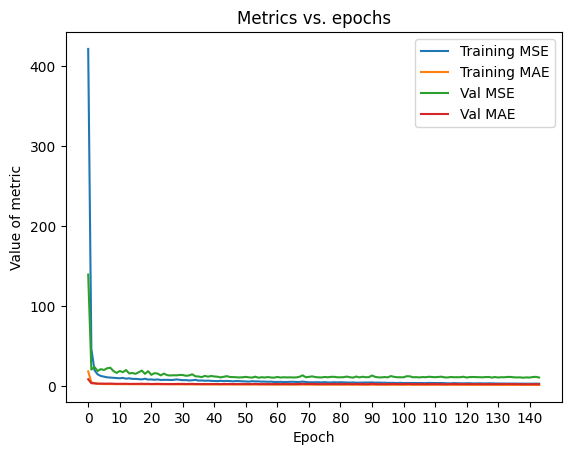

In [33]:
#original plot
plt.plot(history.history['loss'])
plt.plot(history.history["mae"])
plt.plot(history.history["val_loss"])
plt.plot(history.history["val_mae"])
plt.title('Metrics vs. epochs')
plt.ylabel('Value of metric')
plt.xlabel('Epoch')
plt.xticks(np.arange(len(history.history['loss']),step = 10))
plt.legend(['Training MSE', 'Training MAE', "Val MSE","Val MAE"], loc='upper right')
plt.show()

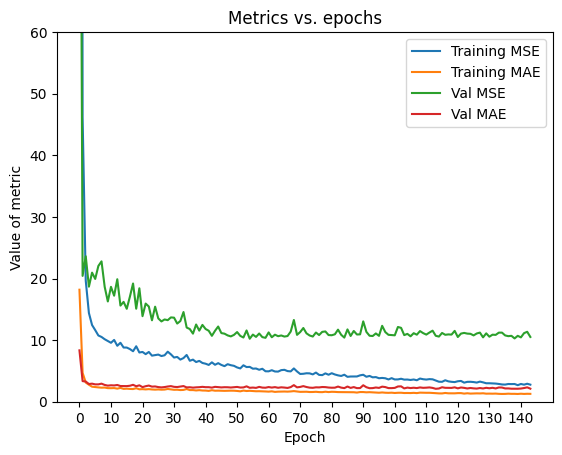

In [34]:
#scaled plot
plt.plot(history.history['loss'])
plt.plot(history.history["mae"])
plt.plot(history.history["val_loss"])
plt.plot(history.history["val_mae"])
plt.title('Metrics vs. epochs')
plt.ylabel('Value of metric')
plt.xlabel('Epoch')
plt.ylim((0,60))
plt.xticks(np.arange(len(history.history['loss']),step = 10))
plt.legend(['Training MSE', 'Training MAE', "Val MSE","Val MAE"], loc='upper right')
plt.show()

In [35]:
### print out the first model results on the validation set ###
model = Sequential([
    Dense(32, activation = "swish", input_shape = train_data[0].shape[1:]),
    Dense(16, activation = "swish"),
    #output layer, which has 1 neuron since the output is a scalar
    Dense(1)
])
model.compile(optimizer = opt, loss = "mse", metrics = ["mae"])
model.evaluate(val_dataset)


4/4 [==============================] - 0s 2ms/step - loss: 569.0239 - mae: 22.2990


[569.0238647460938, 22.29903221130371]

In [36]:
### print out the best model found using the best validation MAE ###
model_best = Sequential([
    Dense(32, activation = "swish", input_shape = train_data[0].shape[1:]),
    Dense(16, activation = "swish"),
    #output layer, which has 1 neuron since the output is a scalar
    Dense(1)
])
model_best.compile(optimizer = opt, loss = "mse", metrics = ["mae"])
model_best.load_weights("best_model.h5")
model_best.evaluate(val_dataset)


4/4 [==============================] - 0s 2ms/step - loss: 10.7021 - mae: 2.0995


[10.702122688293457, 2.0994672775268555]

c) What do you expect would be the effect of training the same model architecture on the Boston housing dataset where the input features have not been standardised? Briefly justify your answer. 

**(5 marks)**

Due to different features being on different scales, there are a few possibilities. Different weights could converge at different speeds, This should hopefully be aided by using nesterov momentum, since it takes into the accumulated gradient, however, it is not guaranteed to work. This could result in very slow convergence, or in extreme cases, no convergence to the minimum.

Another possiblity is that some of the gradients could explode to extremely large values, resulting in numerical overflow when computing the update steps, which could result in NaN values being returned for the MSE and MAE. This is what occured when I tested it.

d) In terms of the computations carried out, describe in a few sentences what the differences would be (if any) between standardising the input features as above, and inserting a batch normalisation layer before the first dense layer of the model. 

**(5 marks)**

If batch normalisation is performed between the input layer and the first hidden layer, then if $\gamma_j = 1\ $ and $\beta_j = 0$  $\forall \ j$ in this layer, we would obtain (not including the layer tag for notational convenience) $z_j = \hat h_j =\frac{x_j - \mathbb{E}[x_j]}{\sqrt {\text{Var}(x_j)}}$ which would be passed into the first hidden layer ($x_j$ represents the $j$ th component of input $x$). However, there comes a subtle difference between batch normalization and standardisation. In batch normalization, the expectations and variance are estimated using the sample mean and variance for each component. However, since the optimizer we use is stochastic gradient descent, we are using minibatches, and since batch normalization computes these means and variances over each minibatch, this would be slightly different to standardising the entire dataset using the training data statistics at the beginning. The two methods would produce very similar results though, so long as $\gamma_j = 1\ $ and $\beta_j = 0$  $\forall \ j$ are fixed, however in practice they are learned parameters.

### Question 2 (Total 30 marks)

In this question you will empirically study the post-activation statistics in the hidden layers of an MLP model under different initialisation strategies. 

Consider an MLP model with 5 hidden layers with 8192, 8192, 8192, 4096 and 4096 neurons respectively. Each hidden layer uses a tanh activation function. Let $\mathbf{W}^{(k)}\in\mathbb{R}^{n_{k+1}\times n_k}$ and $\mathbf{b}^{(k)}\in\mathbb{R}^{n_{k+1}}$ denote the weight matrix and bias vector that map from hidden layer $k$ to hidden layer $k+1$ according to the following:

$$
\begin{align}
\mathbf{h}^{(k)} &= \tanh\left( \mathbf{W}^{(k-1)}\mathbf{h}^{(k-1)} + \mathbf{b}^{(k-1)} \right),\qquad k=1,\ldots, 5,
\end{align}
$$

where $\mathbf{h}^{(0)} \in \mathbb{R}^{1024}$ denotes the input layer, $n_k$ is the number of neurons in hidden layer $k$, and the tanh function is applied elementwise. Suppose the input features ${h}_i^{(0)}$ are each independently sampled from $N(0, \frac{1}{2})$.

a) Compute the (post-)activations of each hidden layer after passing a single input example through the network (where the input example is sampled as described above), and save them in a variable called `layer_activations`. The following initialisation strategy should be used for the model parameters:

1. Each element in each weight matrix $\mathbf{W}^{(k)}\in\mathbb{R}^{n_{k+1}\times n_k}$ is sampled from a standard normal distribution
2. Each bias vector $\mathbf{b}^{(k)}\in\mathbb{R}^{n_{k+1}}$ is initialised to zero
    
Your answer for this part should use only TensorFlow objects and functions, and not use numpy or scipy at all. You can make use of the Keras module if you wish. Weight and bias parameters should be implemented with TF Variable objects.

**(10 marks)**

In [37]:
#a)
#create the input tensor
input = tf.random.normal(shape = (1024,),stddev = tf.math.sqrt(1/2))

#initialise the bias:
neurons = [1024,8192,8192,8192,4096,4096]
bias = [tf.Variable(tf.zeros(shape = (neurons[i],))) for i in range(1,6)]

#create the weight matrices:
#the question only asks us about the activations, so dont need to have the extra weight for the output layer
W = [tf.Variable(tf.random.normal(shape = (neurons[i+1],neurons[i])) )for i in range(5)]


In [38]:
#pad the array with the input as the first "activation"
layer_activations = [input]

#now, we do each layer:
for i in range(0,5):
    a = tf.tensordot(W[i],layer_activations[i],axes = 1) + bias[i]
    h = tf.math.tanh(a)
    layer_activations.append(h)
    
#then drop the first element, since we only want activations from each hidden layer
layer_activations = layer_activations[1:]
#print shapes
#print(len(layer_activations))
#print(layer_activations[0].shape)
#print(layer_activations[1].shape)
#print(layer_activations[2].shape)
#print(layer_activations[3].shape)
#print(layer_activations[4].shape)

b) Create a plot for the normalised (density) histograms for the activation statistics in each of the hidden layers. Briefly comment on the result.

**(5 marks)**

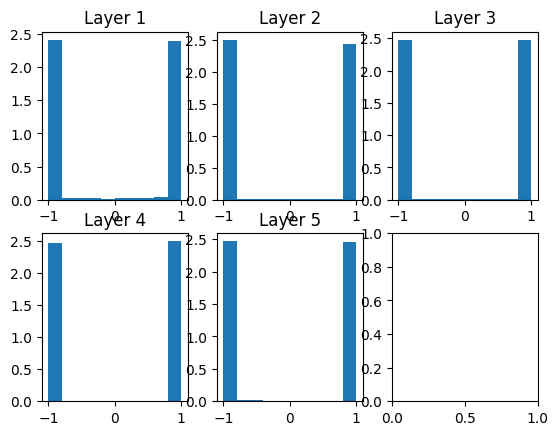

In [39]:
fig,axs = plt.subplots(nrows = 2, ncols =3)
for j in range(2):
    for i in range(3):
        if (i == 2) & (j == 1):
            pass
        else:
            axs[j,i].hist(layer_activations[i + 3*j],density = True)
            axs[j,i].set_title("Layer {}".format(i+3*j+1))
        


We see that with this initialisation strategy, by the first layer, the activations have become saturated, mainly taking values at the saturation points for the tanh activation function, being -1 and 1. It is then very difficult for the neural network to get away from these points, resulting in very similar results in the other hidden layers. Granted, this was only for one pass, however, it still illustrates this issue.

c) Re-compute the activation statistics for the MLP under two different initialisation strategies:

1. Glorot normal distribution initialisation for the weights $\mathbf{W}^{(k)}\in\mathbb{R}^{n_{k+1}\times n_k}$ and zero initialisation for the bias $\mathbf{b}^{(k)}\in\mathbb{R}^{n_{k+1}}$ for $k=0,\ldots,4$
1. Glorot uniform distribution initialisation for the weights $\mathbf{W}^{(k)}\in\mathbb{R}^{n_{k+1}\times n_k}$ and zero initialisation for the bias $\mathbf{b}^{(k)}\in\mathbb{R}^{n_{k+1}}$ for $k=0,\ldots,4$

For each initialisation strategy above, plot normalised histograms for the activation statistics in each hidden layer.

**(10 marks)**

In [40]:
#use the same input as above, and the same initialised bias, just do the weight differently:
#create an array of the stds:

#recall neurons = [1024,8192,8192,8192,4096,4096]
std = [tf.math.sqrt(2/(neurons[i] + neurons[i+1])) for i in range(5)]
W = [tf.Variable(tf.random.normal(shape = (neurons[i+1],neurons[i]), stddev = std[i]))for i in range(5)]

#repeat the forward pass:

#pad the array with the input as the first "activation"
layer_activations = [input]

#now, we do each layer:
for i in range(0,5):
    a = tf.tensordot(W[i],layer_activations[i],axes = 1) + bias[i]
    h = tf.math.tanh(a)
    layer_activations.append(h)
    
#then drop the first element:
layer_activations = layer_activations[1:]

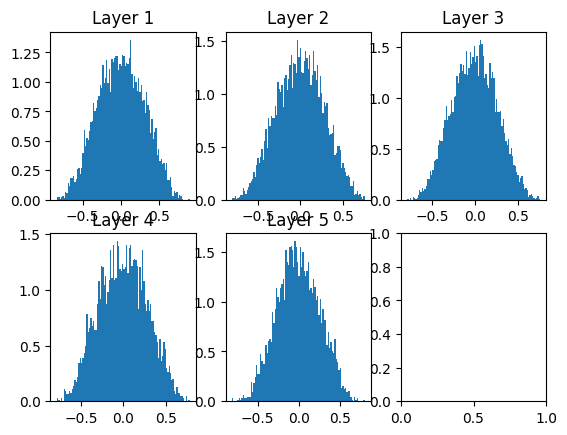

In [41]:
#plot
fig,axs = plt.subplots(nrows = 2, ncols =3)
for j in range(2):
    for i in range(3):
        if (i == 2) & (j == 1):
            pass
        else:
            axs[j,i].hist(layer_activations[i + 3*j],density = True,bins = 100)
            axs[j,i].set_title("Layer {}".format(i+3*j+1))
        


In [42]:
# Now for the uniform version, we can use the same stddev array as above, just change the weight array, using the min and max value from lectures:
a = tf.math.sqrt(float(3)) * std

W = [tf.Variable(tf.random.uniform(shape = (neurons[i+1],neurons[i]), minval = -a[i], maxval = a[i]))for i in range(5)]

layer_activations = [input]
#now, we do each layer:
for i in range(0,5):
    a = tf.tensordot(W[i],layer_activations[i],axes = 1) + bias[i]
    h = tf.math.tanh(a)
    layer_activations.append(h)
    
#then drop the first element:
layer_activations = layer_activations[1:]


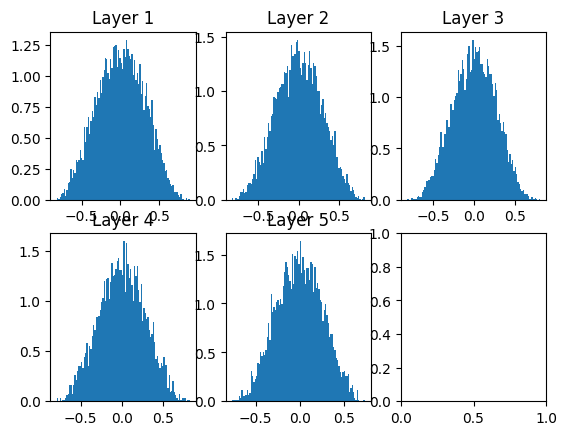

In [43]:
#now plot:
#plot
fig,axs = plt.subplots(nrows = 2, ncols =3)
for j in range(2):
    for i in range(3):
        if (i == 2) & (j == 1):
            pass
        else:
            axs[j,i].hist(layer_activations[i + 3*j],density = True,bins = 100)
            axs[j,i].set_title("Layer {}".format(i+3*j+1))
        


d) Comment on your interpretation of the results in the previous parts of this question, what implications there might be for the successful training of the MLP model, and any limitations of the empirical study carried out.

**(5 marks)**

These histograms are much better than before, we don't have the issue of saturation across the layers in this one iteration now. They show that in both of the two cases, the post activations look relatively normally distributed, which is much better than being stuck at either -1 or 1.

It appears that the assumptions required for glorot initialisation were reasonable in this context, especially the second regarding the equivariance of the input features since we designed them to have the same variance.

This means that hopefully training will be successful for an MLP model of this form, since both the forward and backward signals aren't diminishing.

However, this was only for one iteration. It may be the case that when running multiple iterations, we still have the issue of saturation (although hopefully this choice of initialisation will have mitigated this issue). We would need to run further simulations/test the full model to be able to make any concrete conclusions.

### Question 3 (Total 30 marks)

Consider the following MLP model, designed as an image classifier for the MNIST dataset:

$$
\begin{align}
\mathbf{h}^{(0)} &:= \mathbf{x}\\
\mathbf{h}^{(k)} &= \sigma\left( \mathbf{W}^{(k-1)}\mathbf{h}^{(k-1)} + \mathbf{b}^{(k-1)} \right),\qquad k=1,2\\
\hat{\mathbf{y}} &= \textrm{softmax}\left( \mathbf{W}^{(2)}\mathbf{h}^{(2)} + \mathbf{b}^{(2)} \right)
\end{align}
$$

where $\mathbf{x}\in\mathbb{R}^{784}$ is the flattened image input, $\mathbf{W}^{(k)}\in\mathbb{R}^{n_{k+1}\times n_k}$ and $\mathbf{b}^{(k)}\in\mathbb{R}^{n_{k+1}}$ ($k=0,1,2$) are the model weights and biases, and $n_k$ is the number of neurons in the $k$-th layer.

a) Construct this MLP model using the Sequential API. The model will have two hidden layers with 64 neurons each, using a sigmoid activation function, and take an input of shape `(28, 28)`. The output should be a 10-way softmax.

Load the MNIST dataset from the Keras API. Normalise the input pixel values to the interval $[0,1]$ and convert the labels to one-hot vectors. Do not shuffle the dataset. Save the training inputs and targets as Tensors `x_train` and `y_train` respectively. The validation/test partition can be discarded.

_Hint: you may find it helpful in later parts of this question to use separate Keras layers for the activation functions inside your model object._

**(5 marks)**

In [44]:
model = Sequential([
    #flatten the data
    Flatten(input_shape = (28,28)),
    #hidden layers
    Dense(64, activation = "sigmoid"),
    Dense(64, activation = "sigmoid"),
    #output
    Dense(10,activation = "softmax")
])


In [45]:
#get data
data = tf.keras.datasets.mnist.load_data()

x_train, y_train = data[0]
#rescale
x_train = x_train / 255

#convert labels to 1 hot vectors
#create matrix of 0s
temp = np.zeros((y_train.size, y_train.max()+1), dtype=int)
#put the 1s in
temp[np.arange(y_train.size),y_train] = 1 
y_train = temp

#convert to tensors
x_train = tf.constant(x_train)
y_train = tf.constant(y_train)


b) Suppose that the loss function used to train the MLP is the categorical cross entropy loss function, and $L_i$ denotes the (scalar-valued) loss with respect to the $i$-th input example. Consider the pre-activations in the final layer, given by $\mathbf{a}^{(3)} =  \mathbf{W}^{(2)}\mathbf{h}^{(2)} + \mathbf{b}^{(2)}$. 

Show that the error $\delta^{(k)} := \frac{\partial L_i}{\partial \mathbf{a}^{(3)}}$ given by the derivative of the loss with respect to the final layer pre-activation values is given by $\hat{\mathbf{y}} - \mathbf{y}$, where $\hat{\mathbf{y}}$ is the output from the model, and $\mathbf{y}$ is the ground truth label, represented as a one-hot vector.

Write your answer below in Markdown. You do not need to write any code for this part.

**(7 marks)**

In one hot form, the categorical-cross-entropy is expressed as follows: $L_i = -\sum_{j = 1}^{10} y_{ij}\log(\hat{y}_{ij})$ where $y_{ij}$ represents the $j$ th component of the true label for observation $i$ in one hot form (we use the notation that the first component represents the 0 digit etc), and $\hat{y}_{ij} = \frac{\exp(a_j^{(3)})}{\sum_{k=1}^{10}\exp(a_k^{(3)})}$ represents the $j$ th component of the output of the model for observation $i$.

$$
\begin{align*}
L_i &= -\sum_{j = 1}^{10} y_{ij}\log(\frac{\exp(a_j^{(3)})}{\sum_{k=1}^{10}\exp(a_k^{(3)})}) =  -\sum_{j = 1}^{10} y_{ij}\left(a_j^{(3)} - \log(\sum_{k=1}^{10}\exp(a_k^{(3)}))\right) \\
\implies \delta_p^{(3)} &= \frac{\partial L_i}{\partial a_p^{(3)}} = -y_{ip} + \sum_{j=1}^{10}y_{ij}\frac{\exp(a_p^{(3)})}{\sum_{k=1}^{10}\exp(a_k^{(3)})} = -y_{ip} + \sum_{j=1}^{10}y_{ij} \hat{y}_{ip}
\end{align*}
$$
Now since in the last term, we are summing across a one hot vector, one of the sum components will be non zero, meaning:

$$
\begin{align*}
\delta_p^{(3)} &= -y_{ip} + \sum_{j=1}^{10}y_{ij} \hat{y}_{ip} = -y_{ip} + \hat{y}_{ip} \\
\implies \delta^{(3)} &= \hat{\textbf{y}} - \textbf{y}
\end{align*}
$$

c) Write a function called `grads` that implements the backpropagation equations for this model to return the gradients of the categorical cross entropy loss function with respect to the parameters $\mathbf{W}^{(2)}$ and $\mathbf{b}^{(2)}$. This function should return these gradients as a list `[grads_W2, grads_b2]`, and it should take the following input arguments:

* `model`: your model object, defined using the Sequential API
* `inputs`: a Tensor of shape `(batch_size, 28, 28)`
* `y_true`: a Tensor of shape `(batch_size, 10)` containing the true labels as one-hot vectors

The function `grads` (and any other function it uses) should only use TensorFlow ops. In particular, it should not use automatic differentiation or other libraries (e.g. numpy).

You should make sure that your code is clearly written, and variables sensibly named. You might find it helpful to write separate helper functions to be used in the `grads` function.

 **(15 marks)**

In [46]:
def grads(model,inputs,y_true):
    model.compile(loss = "CategoricalCrossentropy")
    #find the output of the model for the inputs
    probs = tf.constant(model(inputs),dtype = float) #dim (batch,10), y_true is the same dimension
    y_true = tf.cast(y_true,float)
    #error, with all observations stacked into a matrix
    delta_3 = probs - y_true #dim (batch,10)
    #output of second layer:
    get_layer_outputs = tf.keras.backend.function([model.layers[0].input], [layer.output for layer in model.layers])
    layer_2_h = tf.constant(get_layer_outputs([inputs])[2])

    #calculate grads, for each input
    grads_W2 = tf.constant(np.array([tf.tensordot(delta_3[i,],layer_2_h[i,],axes = 0) for i in range (inputs.shape[0])]))
    grads_b2 = delta_3
    #or:
    #grads_W2 = tf.einsum('ij,ik->ijk', delta_3, layer_2_h)
    #grads_b2 = delta_3
    
    #then average over batch of inputs, as specified on ED
    grads_W2 = tf.reduce_mean(grads_W2,axis = 0)
    grads_b2 = tf.reduce_mean(grads_b2,axis = 0)
    return [grads_W2, grads_b2]

d) Compute the gradients on the first 16 examples in the training set using your `grads` function and model. Print out the gradients that are computed. 

**(3 marks)**

In [47]:
grads_W2,grads_b2 = grads(model,x_train[0:16,], y_train[0:16])
print(grads_W2)

tf.Tensor(
[[ 0.0089534   0.00564715  0.0080393   0.00047375  0.00287266  0.00658471
   0.00814985  0.00440263  0.00753431  0.00634736  0.00426696  0.00445191
   0.0079845   0.00482668  0.00733485  0.00640422  0.00524908  0.00538009
   0.00491224  0.00505655  0.00706708  0.00284561  0.00194139  0.00474344
   0.00395042  0.00421092  0.00593125  0.00741901  0.00327798  0.00695649
   0.0024928   0.0018467   0.00364479  0.00508516  0.0087292   0.00652662
   0.00291505  0.00614127  0.00856582  0.00398625  0.0062443   0.00814971
   0.00561174  0.00331581  0.00518112  0.00437039  0.0006685   0.00422047
   0.0031743   0.00380657  0.00222017  0.00299562  0.00693709  0.00758519
   0.00397749  0.00816921  0.00475757  0.00549249  0.00613912  0.00413127
   0.00716139  0.00396113  0.00426171  0.00900182]
 [-0.05333139 -0.04802641 -0.05568392 -0.01854472 -0.02748789 -0.04032459
  -0.05366167 -0.03125996 -0.05570473 -0.0495103  -0.02990782 -0.03833212
  -0.05194977 -0.03638895 -0.04243267 -0.03677142 

In [48]:
print(grads_b2)

tf.Tensor(
[ 0.01068128 -0.07798676  0.3176856  -0.12734997 -0.04581258 -0.09261228
 -0.02141114  0.02739346  0.03726283 -0.02785044], shape=(10,), dtype=float32)
